<a href="https://colab.research.google.com/github/subhajitmahapatra92da7ds/startup-Case-Study/blob/Startup-case-study-2nd-part/Case_Study_1(2nd)_Startups_Extension.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This dataset has funding information of the Indian startups from January 2015 to August 2017.

Feature Details :

 * SNo - Serial number.
 * Date - Date of funding in format DD/MM/YYYY.
 * StartupName - Name of the startup which got funded.
 * IndustryVertical - Industry to which the startup belongs.
 * SubVertical - Sub-category of the industry type.
 * CityLocation - City which the startup is based out of.
 * InvestorsName - Name of the investors involved in the funding round.
 * InvestmentType - Either Private Equity or Seed Funding.
 * AmountInUSD - Funding Amount in USD.
 * Remarks - Other information, if any.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Dataset

In [ ]:
startup = pd.read_csv('/content/startup_funding.csv')
startup.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [ ]:
# Make a copy of the Original dataet and use this copied dtaset for case study, so it's not effect the original dataset.
df = startup.copy()

In [ ]:
# Exploring a brife information about the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


In [ ]:
# Checking how many nullvalues are present in every feature of the dataset.
df.isnull().sum()

Sr No                   0
Date dd/mm/yyyy         0
Startup Name            0
Industry Vertical     171
SubVertical           936
City  Location        180
Investors Name         24
InvestmentnType         4
Amount in USD         960
Remarks              2625
dtype: int64

In [ ]:
# 'Amount in USD' column is not in correct datatype. It's present as a 'Object'. So I convert this into 'Float' datatype. but here we face some issues for
# wrong formatng,some of the positions have values which cannot be converted to numerical data, so I replace these incorrect things.
df['Amount in USD'] = df['Amount in USD'].str.replace('\\', '',regex=True)
df['Amount in USD'] = df['Amount in USD'].str.replace('xc2xa0', '',regex=True)
df['Amount in USD'] = df['Amount in USD'].str.replace('N/A', '0')
df['Amount in USD'] = df['Amount in USD'].str.replace(',', '')
df['Amount in USD'] = df['Amount in USD'].str.replace('unknown', '0')
df['Amount in USD'] = df['Amount in USD'].str.replace('undisclosed', '0')
df['Amount in USD'] = df['Amount in USD'].str.replace('Undisclosed', '0')
df['Amount in USD'] = df['Amount in USD'].str.rstrip('+')

In [ ]:
# After solving these issues I converted  'Amount in USD' column into 'float datatype and fill nullvalues with '0'.Which is not creat probelm for any
# numerical operation on these column and didn't affect calculation . and do checking for nullvalue and datatype
df['Amount in USD'] = df['Amount in USD'].astype(float).fillna(0)
print("For 'Amount in USD' Number of nullvalues - ",df['Amount in USD'].isnull().sum())
print("For 'Amount in USD'Datatype is - ",df['Amount in USD'].dtypes)

For 'Amount in USD' Number of nullvalues -  0
For 'Amount in USD'Datatype is -  float64


In [ ]:
## In 'City  Location' column some of the positions have values which cannot be converted to umerical data,so I replace these incorrect things.
df['City  Location'] = df['City  Location'].str.replace('\\', '',regex=True)
df['City  Location'] = df['City  Location'].str.replace('xc2xa0', '',regex=True)

In [ ]:
df = df.dropna(subset='City  Location') # drop some row of 'City  Location' columns which contain nullvalues

In [ ]:
## In 'Investors Name' column some of the positions have values which cannot be converted to umerical data,so I replace these incorrect things.
df['Investors Name'] = df['Investors Name'].str.replace('\\', '',regex=True)
df['Investors Name'] = df['Investors Name'].str.replace('xc2xa0', '',regex=True)

In [ ]:
df = df.dropna(subset='Investors Name') # drop some row of 'Investors Name' columns which contain nullvalues

In [ ]:
## In 'InvestmentnType' column some of the positions have values which cannot be converted to umerical data,so I replace these incorrect things.
df['InvestmentnType'] = df['InvestmentnType'].str.replace('\\', '',regex=True)
df['InvestmentnType'] = df['InvestmentnType'].str.replace('xc2xa0', '',regex=True)

In [ ]:
df = df.dropna(subset='InvestmentnType') # drop some row of 'InvestmentnType'' columns which contain nullvalues

In [ ]:
#  Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake.

#Cleaning the data by using lambda function
df['InvestmentnType'] =df['InvestmentnType'].apply(lambda x : "Private Equity" if 'Privet' in x
                                                                  else  "Seed Funding" if 'Seed' in x
                                                                  else  "Debt Funding" if 'Debt' in x
                                                                  else  "Private Equity" if 'Equity' in x
                                                                  else "Crowd Funding")
df['InvestmentnType'].unique()

array(['Private Equity', 'Crowd Funding', 'Seed Funding', 'Debt Funding'],
      dtype=object)

In [ ]:
# Correcting some of the startups name
df['Startup Name'] = df['Startup Name'].replace('"BYJU\\\\\'S"','BYJU’S')
df['Startup Name'] = df['Startup Name'].replace('BYJU\\\\xe2\\\\x80\\\\x99s','BYJU’S')
df['Startup Name'] = df['Startup Name'].replace('Byju\\\\xe2\\\\x80\\\\x99s','BYJU’S')
df['Startup Name'] = df['Startup Name'].replace('Flipkart.com','Flipkart')
df['Startup Name'] = df['Startup Name'].replace('OYO Rooms','OYO')
df['Startup Name'] = df['Startup Name'].replace('Oyo','OYO')
df['Startup Name'] = df['Startup Name'].replace('Oyo Rooms','OYO')
df['Startup Name'] = df['Startup Name'].replace('OyoRooms','OYO')
df['Startup Name'] = df['Startup Name'].replace('Oyorooms','OYO')
df['Startup Name'] = df['Startup Name'].replace('Ola Cabs','Ola')
df['Startup Name'] = df['Startup Name'].replace('Ola Electric','Ola')
df['Startup Name'] = df['Startup Name'].replace('Olacabs','Ola')

# Qustions

***************
*******

**1. Your Friend has developed the Product and he wants to establish the product startup and he is searching for a perfect location where getting the investment has a high chance. But due to its financial restriction, he can choose only between three locations -  Bangalore, Mumbai, and NCR. As a friend, you want to help your friend decide the location. NCR includes Gurgaon, Noida and New Delhi. Find the location where the most number of funding is done. That means, find the location where startups have received funding maximum number of times. Plot the bar graph between location and number of funding. Take the city name "Delhi" as "New Delhi". Check the case-sensitiveness of cities also. That means, at some place instead of "Bangalore", "bangalore" is given. Take the city name as "Bangalore". For few startups multiple locations are given, one Indian and one Foreign. Consider the startup if any one of the city lies in given locations.**


In [ ]:
#For few startups multiple locations are given, one Indian and one Foreign.
#therefore taking  those startups in Indian startup also.
#In most of the cases Indian city names are at first position, so taking only first position.

df['City  Location'] = df['City  Location'].apply(lambda x : x.split('/')[0] if '/' in x else x)

In [ ]:
#Cleaning the data in "City  Location" column
#correcting the values which are indicating the same cities but have variation in spellings and are case sensitive
#and also correcting the values which are not in proper string format.

df['City  Location'] = df['City  Location'].replace('Delhi', 'New Delhi')
df['City  Location'] = df['City  Location'].replace('Bengaluru', 'Bangalore')
df['City  Location'] = df['City  Location'].replace('Gurugram', 'Gurgaon')
df['City  Location'] = df['City  Location'].replace('New York, Bengaluru', 'Bangalore')
df['City  Location'] = df['City  Location'].replace('Delhi & Cambridge', 'New Delhi')
df['City  Location'] = df['City  Location'].replace('Kolkatta', 'Kolkata')
df['City  Location'] = df['City  Location'].replace('Ahemadabad', 'Ahmedabad')
df['City  Location'] = df['City  Location'].replace('Ahemdabad', 'Ahmedabad')
df['City  Location'] = df['City  Location'].replace('Bhubaneswar', 'Bhubneswar')
df['City  Location'] = df['City  Location'].replace('Nw Delhi', 'New Delhi')

In [ ]:
# Find top 5 city with respect to recieve higest number of startup count and getting top amount of funding.

selected_city = df[df['City  Location'].isin(['Bangalore', 'Mumbai','Gurgaon', 'Noida', 'New Delhi'])]
w = selected_city.groupby('City  Location').agg({'Amount in USD' : 'sum' , 'Startup Name' : 'count',}).reset_index().sort_values(by = 'Amount in USD',ascending=False)
w = w.rename(columns = {'Startup Name' : 'Number of Startup'})
w['Percentage(%)'] = ((w['Amount in USD']/df['Amount in USD'].sum())*100).round(2)
w

,City Location,Amount in USD,Number of Startup,Percentage(%)
0,Bangalore,1.849521e+10,839,51.32
2,Mumbai,4.334740e+09,559,12.03
1,Gurgaon,3.872024e+09,339,10.74
3,New Delhi,3.299875e+09,457,9.16
4,Noida,1.282864e+09,93,3.56


In [ ]:
# Top city in desire aspect like receving startup count and amount of funding.
selected_city['City  Location'].value_counts().idxmax()

'Bangalore'

In [ ]:
# making a frequency table with respect to city location and investment type for better insight.
s = pd.crosstab(selected_city['City  Location'],selected_city['InvestmentnType'])
s

InvestmentnType,Crowd Funding,Debt Funding,Private Equity,Seed Funding
City Location,,,,
Bangalore,28,4,409,398
Gurgaon,19,7,161,152
Mumbai,11,6,281,261
New Delhi,13,2,170,272
Noida,2,0,41,50


<ipython-input-230-c54b595ba8a2>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


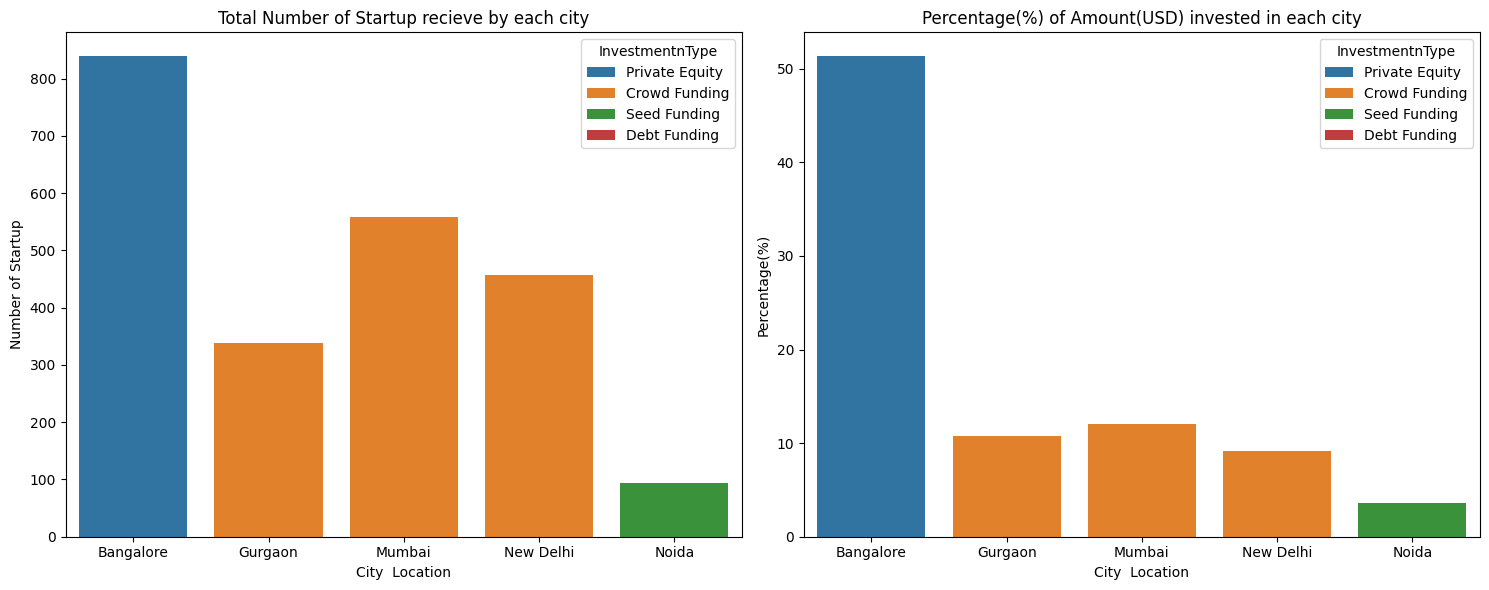

In [ ]:
# creat a plot with two subplot.
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)

plt.subplot(1,2,1)
sns.barplot(w , x = 'City  Location' , y = 'Number of Startup',hue=df['InvestmentnType'])
plt.title('Total Number of Startup recieve by each city')
plt.xlabel('City  Location')

plt.subplot(1,2,2)
sns.barplot(w , x = 'City  Location' , y = 'Percentage(%)' ,hue=df['InvestmentnType'])
plt.title('Percentage(%) of Amount(USD) invested in each city')
plt.xlabel('City  Location')

plt.tight_layout()
plt.show()

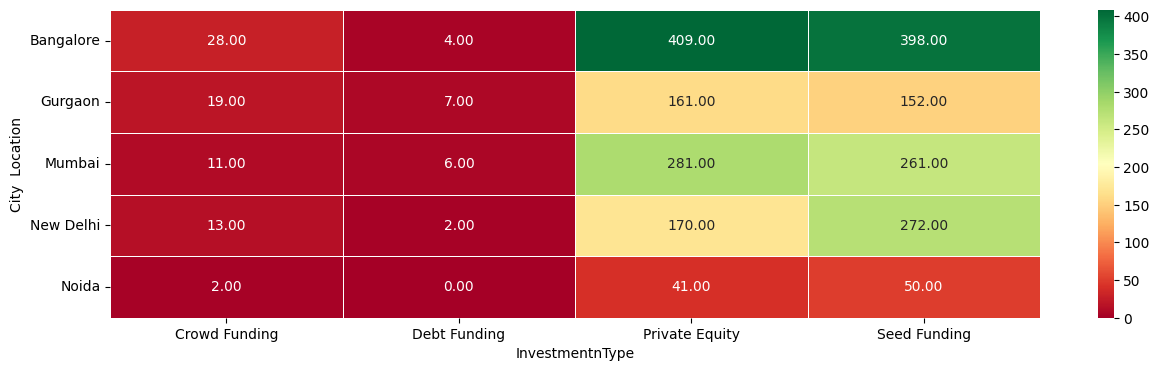

In [ ]:
# creat a heatmap for better analyse.
plt.figure(figsize=(15,4))
sns.heatmap(s , cmap='RdYlGn',fmt = '0.2f' , annot = True , linewidth = 0.6)
plt.show()

**Justification :**

From the above analysis and vizualiazation we can see that 'Bangalore' city has higest number of startup and also get highest number of amount recieve for investment. Also we can see that 50.18% of total amount invested in 'Bangalore'. Another things is, in 'Private Equity' and 'Seed Funding' type Invesment is highest in 'Bangalore'. So I suggest my friend that 'Bangalore' city is the best choice for starting and establish the product startup.

****************
******

**2. Even after trying so many times, your friend’s startup could not find the investment. So you decided to take this matter in your hand and try to find the list of investors who probably can invest in your friend’s startup. Your list will increase the chance of your friend startup getting some initial investment by contacting these investors. Find the top 5 investors who have invested maximum number of times (consider repeat investments in one company also). In a startup, multiple investors might have invested. So consider each investor for that startup. Ignore undisclosed investors.**

In [ ]:
# drop all undisclosed investors rows and make a new DataFrame for analysis
new_df = df[~(df['Investors Name'].str.contains('^[un,Un].+closed'))]
new_df

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bangalore,Tiger Global Management,Private Equity,200000000.0,NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Crowd Funding,8048394.0,NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bangalore,Sequoia Capital India,Crowd Funding,18358860.0,NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Crowd Funding,3000000.0,NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Funding,1800000.0,NaN
...,...,...,...,...,...,...,...,...,...,...
2868,2869,29/04/2015,Tracxn,Startup Analytics platform,NaN,Bangalore,SAIF Partners,Private Equity,3500000.0,Series A
2869,2870,29/04/2015,Dazo,Mobile Food Ordering app,NaN,Bangalore,"Sumit Jain, Aprameya Radhakrishna, Alok Goel, ...",Seed Funding,0.0,NaN
2870,2871,29/04/2015,Tradelab,Financial Markets Software,NaN,Bangalore,Rainmatter,Seed Funding,400000.0,NaN
2871,2872,29/04/2015,PiQube,Hiring Analytics platform,NaN,Chennai,The HR Fund,Seed Funding,500000.0,NaN


In [ ]:
# feach a new dataframe on the base of top 5 investors.
top5_investor = new_df['Investors Name'].value_counts().nlargest().index.tolist()
newdf_top5_investor = new_df[new_df['Investors Name'].isin(top5_investor)]
newdf_top5_investor

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
322,323,05/03/2018,Finova Capital,Consumer Internet,Online Lending,Jaipur,Sequoia Capital,Private Equity,6000000.0,NaN
347,348,27/03/2018,The Print,Media,News portal,New Delhi,Ratan Tata,Seed Funding,535000.0,NaN
423,424,30/01/2018,BrowserStack,Technology,Browser Testing,Mumbai,Accel Partners,Private Equity,50000000.0,NaN
446,447,12/12/2017,Simility,Technology,Adaptive Fraud Intelligence Platform,Hyderabad,Accel Partners,Private Equity,17500000.0,NaN
492,493,13/11/2017,Universal Sportsbiz Pvt. Ltd,ECommerce,Celebrity fashion accessories and merchandise,Mumbai,Accel Partners,Private Equity,15000000.0,NaN
...,...,...,...,...,...,...,...,...,...,...
2705,2706,15/06/2015,Homelane,Home Furnishing Solutions,NaN,Bangalore,Sequoia Capital,Private Equity,50000000.0,Series B
2729,2730,23/06/2015,Goodservice,Mobile Chat based concierge service,NaN,New Delhi,Sequoia Capital,Private Equity,1600000.0,Series A
2786,2787,19/05/2015,Akosha,Business Messaging App,NaN,New Delhi,Sequoia Capital,Private Equity,16000000.0,Series B
2807,2808,28/05/2015,Zoomcar,Self-driven Car rental,NaN,Bangalore,Sequoia Capital,Private Equity,5000000.0,Series B Interim Funding


In [ ]:
# name of top 5 investors
top5_investor

['Indian Angel Network',
 'Ratan Tata',
 'Kalaari Capital',
 'Sequoia Capital',
 'Accel Partners']

In [ ]:
# name of top 5 city locations by receving startup count and amount of funding.
selected_city['City  Location'].value_counts().index.tolist()

['Bangalore', 'Mumbai', 'New Delhi', 'Gurgaon', 'Noida']

In [ ]:
# Fetch a dataframe with top investor who are inveted in Bangalore
tempdf = newdf_top5_investor[newdf_top5_investor['City  Location'] == 'Bangalore']
investinBangalore = tempdf[['Investors Name','City  Location']]
investinBangalore

,Investors Name,City Location
1322,Sequoia Capital,Bangalore
1336,Kalaari Capital,Bangalore
1378,Accel Partners,Bangalore
1455,Indian Angel Network,Bangalore
1471,Kalaari Capital,Bangalore
1561,Indian Angel Network,Bangalore
1613,Sequoia Capital,Bangalore
1639,Kalaari Capital,Bangalore
1717,Ratan Tata,Bangalore
1952,Ratan Tata,Bangalore


In [ ]:
# creat a dataframe of top 5 investors with how many investment they do and it's percentage
investinBangalore = investinBangalore['Investors Name'].value_counts().reset_index()
investinBangalore.columns = ['Investors_Name','Count_of_Investment']
investinBangalore['prct(%)'] = ((investinBangalore['Count_of_Investment']/df['Startup Name'].count())*100).round(2)
investinBangalore

,Investors_Name,Count_of_Investment,prct(%)
0,Kalaari Capital,6,0.21
1,Sequoia Capital,5,0.18
2,Ratan Tata,5,0.18
3,Accel Partners,3,0.11
4,Indian Angel Network,3,0.11


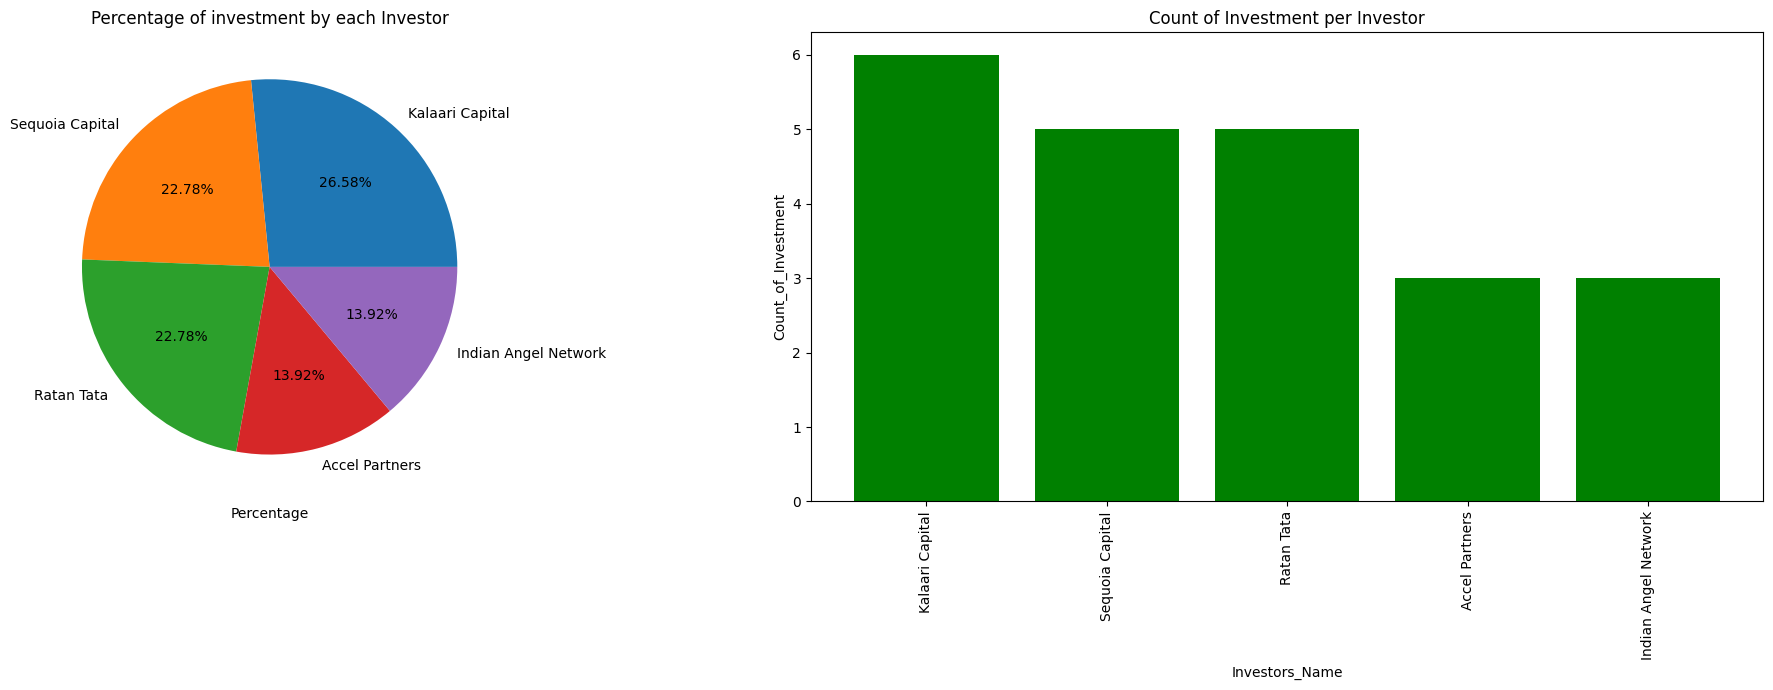

In [ ]:
# Plot a graph with two subplot, one is pie chart and other is bar graph
plt.figure(figsize=(20,7))

plt.subplot(1,2,1)
plt.pie(investinBangalore['prct(%)'],labels=investinBangalore['Investors_Name'] , autopct = '%0.2f%%')
plt.title('Percentage of investment by each Investor')
plt.xlabel('Percentage')

plt.subplot(1,2,2)
plt.bar(investinBangalore['Investors_Name'],investinBangalore['Count_of_Investment'],color='Green')
plt.title('Count of Investment per Investor')
plt.xlabel('Investors_Name')
plt.ylabel('Count_of_Investment')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

**Justification:**

We can see that from above, top 5 investors named - **'Indian Angel Network' ,  
'Ratan Tata' , 'Kalaari Capital' , 'Sequoia Capital' , 'Accel Partners'**  are invested multiple time in 'Bangalore'. So if my friend contact with these investors and can convince them for investment in his startup then it will be the good decision

******
******

**3. After re-analysing the dataset you found out that some investors have invested in the same startup at different number of funding rounds. So before finalizing the previous list, you want to improvise it by finding the top 5 investors who have invested in a different number of startups. This list will be more helpful than your previous list in finding the investment for your friend's startup. Find the top 5 investors who have invested a maximum number of times in different companies. That means, if one investor has invested multiple times in one startup, count one for that company. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.**

In [ ]:
# Fetch a dataframe where unique pair of Investors Name and Startup Name are present. here investors have invested in different companies.
unique_df = new_df[['Investors Name','Startup Name']].drop_duplicates()
unique_df

,Investors Name,Startup Name
0,Tiger Global Management,BYJU’S
1,Susquehanna Growth Equity,Shuttl
2,Sequoia Capital India,Mamaearth
3,Vinod Khatumal,https://www.wealthbucket.in/
4,Sprout Venture Partners,Fashor
...,...,...
2868,SAIF Partners,Tracxn
2869,"Sumit Jain, Aprameya Radhakrishna, Alok Goel, ...",Dazo
2870,Rainmatter,Tradelab
2871,The HR Fund,PiQube


In [ ]:
# Dataframe of top 5 Investors  who have invested a maximum number of times in different companies.
unique_investment = unique_df.groupby('Investors Name')['Startup Name'].nunique().sort_values(ascending=False).head().reset_index(name = 'Count_Unique_invst.')
unique_investment

,Investors Name,Count_Unique_invst.
0,Indian Angel Network,24
1,Ratan Tata,23
2,Kalaari Capital,15
3,Sequoia Capital,13
4,Accel Partners,12


In [ ]:
# top 5 investors who have invested a maximum number of times in different companies
unique_investment['Investors Name'].tolist()

['Indian Angel Network',
 'Ratan Tata',
 'Kalaari Capital',
 'Sequoia Capital',
 'Accel Partners']

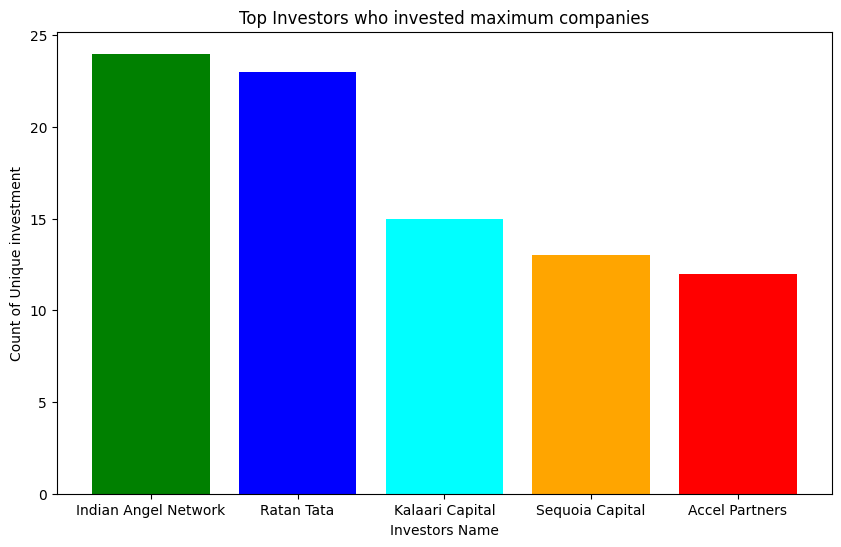

In [ ]:
# ploting a bar graph
plt.figure(figsize = (10,6))
plt.bar(unique_investment['Investors Name'] , unique_investment['Count_Unique_invst.'],color = ['Green','Blue','Aqua','Orange','Red'])
plt.title('Top Investors who invested maximum companies')
plt.xlabel('Investors Name')
plt.ylabel('Count of Unique investment')
plt.show()

**Justification :**

Here we got top 5 investors who have invested a maximum number of times in different companies. That means, if one investor has invested multiple times in one startup. so if my friend convince them to invest in his startup,then it will be more helpful for my friend's success.
Also I observe one thing is that top5 investors(['Indian Angel Network' , 'Ratan Tata' , 'Kalaari Capital' , 'Sequoia Capital' , 'Accel Partners']) who invested in 'Banglore' are
they are also top5 investors(['Indian Angel Network' , 'Ratan Tata' , 'Kalaari Capital' , 'Sequoia Capital' , 'Accel Partners']) as an invest in maximam different company. So this list of Investors will must be helpfull for  increase the chance to get investment.  

******
*******

 **4. Even after putting so much effort in finding the probable investors, it didn't turn out to be helpful for your friend. So you went to your investor friend to understand the situation better and your investor friend explained to you about the different Investment Types and their features. This new information will be helpful in finding the right investor. Since your friend's startup is at an early stage startup, the best-suited investment type would be - Seed Funding and Crowdfunding. Find the top 5 investors who have invested in a different number of startups and their investment type is Crowdfunding or Seed Funding. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistakes. You can find this by printing unique values from this column. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.**

In [ ]:
# Fetch a DataFrame where investors have invested in a different number of startups and their investment type is Crowdfunding or Seed Funding
unique_df2 = new_df[~(new_df[['Investors Name','Startup Name','InvestmentnType']].duplicated(subset = ['Investors Name','Startup Name']))]
unique_df2_sc = unique_df2[unique_df2['InvestmentnType'].isin(["Seed Funding","Crowd Funding"])]
unique_df2_sc

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Crowd Funding,8048394.0,NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bangalore,Sequoia Capital India,Crowd Funding,18358860.0,NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Crowd Funding,3000000.0,NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Funding,1800000.0,NaN
5,6,13/01/2020,Pando,Logistics,"Open-market, freight management platform",Chennai,Chiratae Ventures,Crowd Funding,9000000.0,NaN
...,...,...,...,...,...,...,...,...,...,...
2864,2865,28/04/2015,Jay Robotix,Robotic Program learning,NaN,Hyderabad,Cross Border Angels & others,Seed Funding,250000.0,NaN
2866,2867,29/04/2015,ReGlobe,Used Gadgets Buy / Refurbishing,NaN,Gurgaon,"Bessemer Ventures, Blume Ventures",Seed Funding,1000000.0,NaN
2869,2870,29/04/2015,Dazo,Mobile Food Ordering app,NaN,Bangalore,"Sumit Jain, Aprameya Radhakrishna, Alok Goel, ...",Seed Funding,0.0,NaN
2870,2871,29/04/2015,Tradelab,Financial Markets Software,NaN,Bangalore,Rainmatter,Seed Funding,400000.0,NaN


In [ ]:
# Creat a DataFrame where top5 investors who have invested in a different number of startups and their investment type is Crowdfunding or Seed Funding
df2_sc = unique_df2_sc.groupby(['Investors Name','InvestmentnType'])['Startup Name'].nunique().reset_index().sort_values(by = 'Startup Name',ascending=False).head()
df2_sc

,Investors Name,InvestmentnType,Startup Name
451,Indian Angel Network,Seed Funding,23
1139,Venture Catalysts,Seed Funding,9
873,Ratan Tata,Seed Funding,7
1208,YouWeCan Ventures,Seed Funding,7
524,Kalaari Capital,Seed Funding,6


In [ ]:
# top Investment type with investment count
selected_investmenttype = unique_df2_sc['InvestmentnType'].value_counts().reset_index()
selected_investmenttype

,index,InvestmentnType
0,Seed Funding,1319
1,Crowd Funding,102


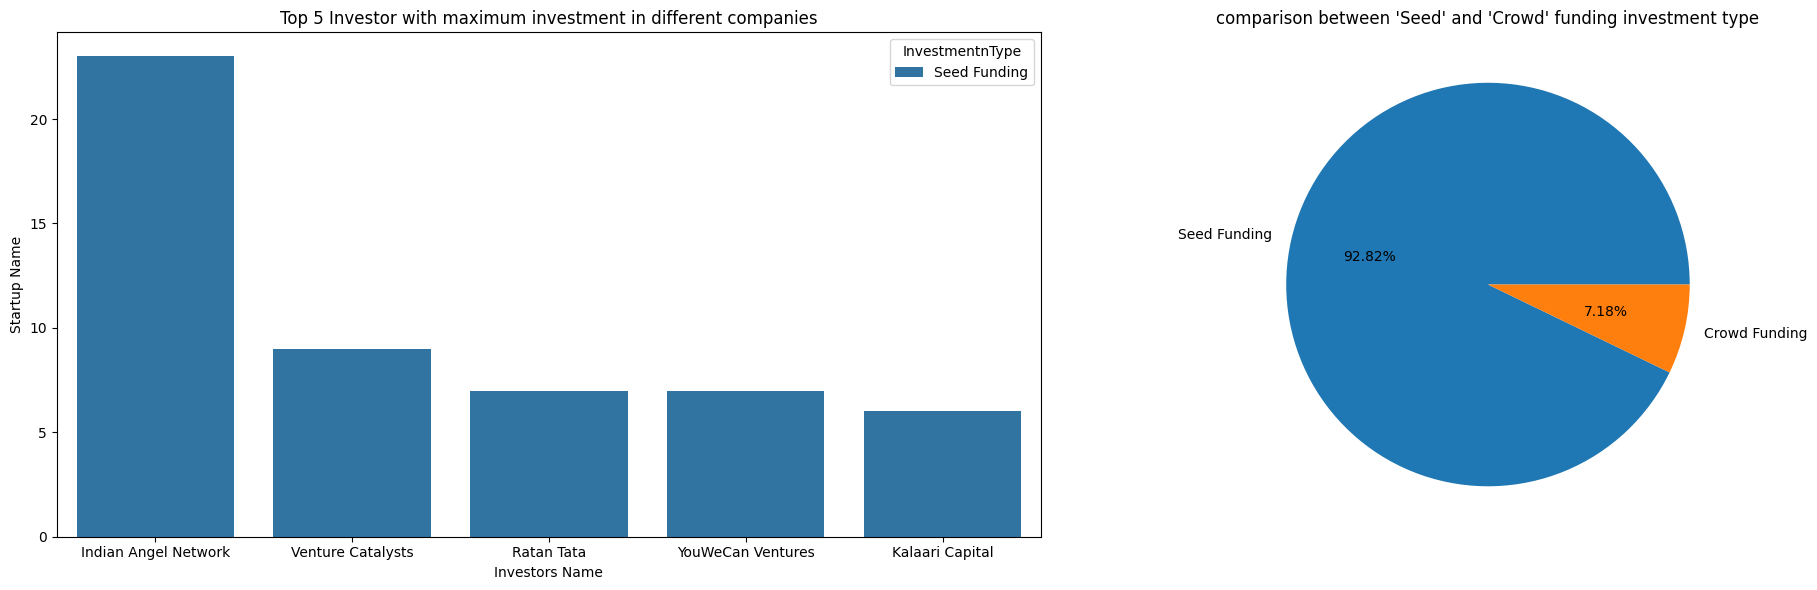

In [ ]:
# plot a graph with with two subplot, one is bar graph and another is pie chart
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
sns.barplot(df2_sc , x = 'Investors Name' , y = 'Startup Name' , hue = 'InvestmentnType')
plt.title('Top 5 Investor with maximum investment in different companies')

plt.subplot(1,2,2)
plt.pie(selected_investmenttype['InvestmentnType'] , labels = selected_investmenttype['index'] , autopct ='%.2f%%')
plt.title("comparison between 'Seed' and 'Crowd' funding investment type" )

plt.tight_layout()
plt.show()

**Justification :**

From above we can see that - there are  **top 5 investors(['Indian Angel Network' , 'Venture Catalysts' , 'Ratan Tata' , 'YouWeCan Ventures' , 'Kalaari Capital'])**who have invested in a different number of startups **(Here Indian Angel Network is top investor)** and their investment type is **Crowdfunding or Seed Funding**. Even I notice that only in 'Seed Funding' they are invest. Although in 'Crowd funding' investment are come but not from top investors, even 'Crowd funding' get only 7.18% investment where 'Seed Funding' get 92.82% investment. So I suggest my friend that in 'Seed Funding' type investment is best for early stage startup and get investment easily as compare to other.

*****
*****

 **5. Due to your immense help, your friend startup successfully got seed funding and it is in operational mode. Now your friend wants to expand his startup and he is looking for new investors for his startup. Now you again come as a savior to help your friend and want to create a list of probable new investors. Before moving forward you remember your investor friend's advice that finding the investors by analyzing the investment type. Since your friend's startup is not in the early phase it is in a growth stage so the best-suited investment type is Private Equity. Find the top 5 investors who have invested in a different number of startups and their investment type is Private Equity. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistakes. You can find this by printing unique values from this column.There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.**

In [ ]:
# Fetch a DataFrame where investors have invested in a different number of startups and their investment type is "Private Equity"
unique_df3 = new_df[~(new_df[['Investors Name','Startup Name','InvestmentnType']].duplicated(subset = ['Investors Name','Startup Name']))]
unique_df3_sc = unique_df3[(unique_df3['InvestmentnType']  == "Private Equity")]
unique_df3_sc

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bangalore,Tiger Global Management,Private Equity,200000000.0,NaN
6,7,10/01/2020,Zomato,Hospitality,Online Food Delivery Platform,Gurgaon,Ant Financial,Private Equity,150000000.0,NaN
37,38,04/09/2019,Digital F5,"Advertising, Marketing",Digital marketing firm,Mumbai,TIW Private Equity,Private Equity,6000000.0,NaN
67,68,10/07/2019,BYJU’S,EdTech,Education,Bangalore,Qatar Investment Authority,Private Equity,150000000.0,NaN
99,100,12/04/2019,Medlife,E-commerce,Online Medicine,Bangalore,Prasid Uno Family Trust,Private Equity,17000000.0,NaN
...,...,...,...,...,...,...,...,...,...,...
2863,2864,28/04/2015,Urban Ladder,Online Furniture ecommerce,NaN,Bangalore,"Anand Rajaraman, Venky Harinarayan",Private Equity,0.0,Series D
2865,2866,28/04/2015,Naaptol.com,Tele-Shopping / eCommerce,NaN,Mumbai,Mitsui & Co & existing investors,Private Equity,21500000.0,Series C
2867,2868,29/04/2015,Icertis,Cloud Enterprise Software,NaN,Pune,"Greycroft Partners, Fidelity Growth Partners",Private Equity,6000000.0,Series A
2868,2869,29/04/2015,Tracxn,Startup Analytics platform,NaN,Bangalore,SAIF Partners,Private Equity,3500000.0,Series A


In [ ]:
# Creat a DataFrame where top5 investors who have invested in a different number of startups and their investment type is "Private Equity"
df3_sc = unique_df3_sc.groupby(['Investors Name','InvestmentnType'])['Startup Name'].nunique().reset_index().sort_values(by = 'Startup Name',ascending=False).head()
df3_sc

,Investors Name,InvestmentnType,Startup Name
735,Ratan Tata,Private Equity,16
819,Sequoia Capital,Private Equity,13
758,RoundGlass Partners,Private Equity,9
490,Kalaari Capital,Private Equity,9
26,Accel Partners,Private Equity,9


In [ ]:
# top Investment type with investment count
selected_investmenttype2 = unique_df3_sc['InvestmentnType'].value_counts().reset_index()
selected_investmenttype2

,index,InvestmentnType
0,Private Equity,1246


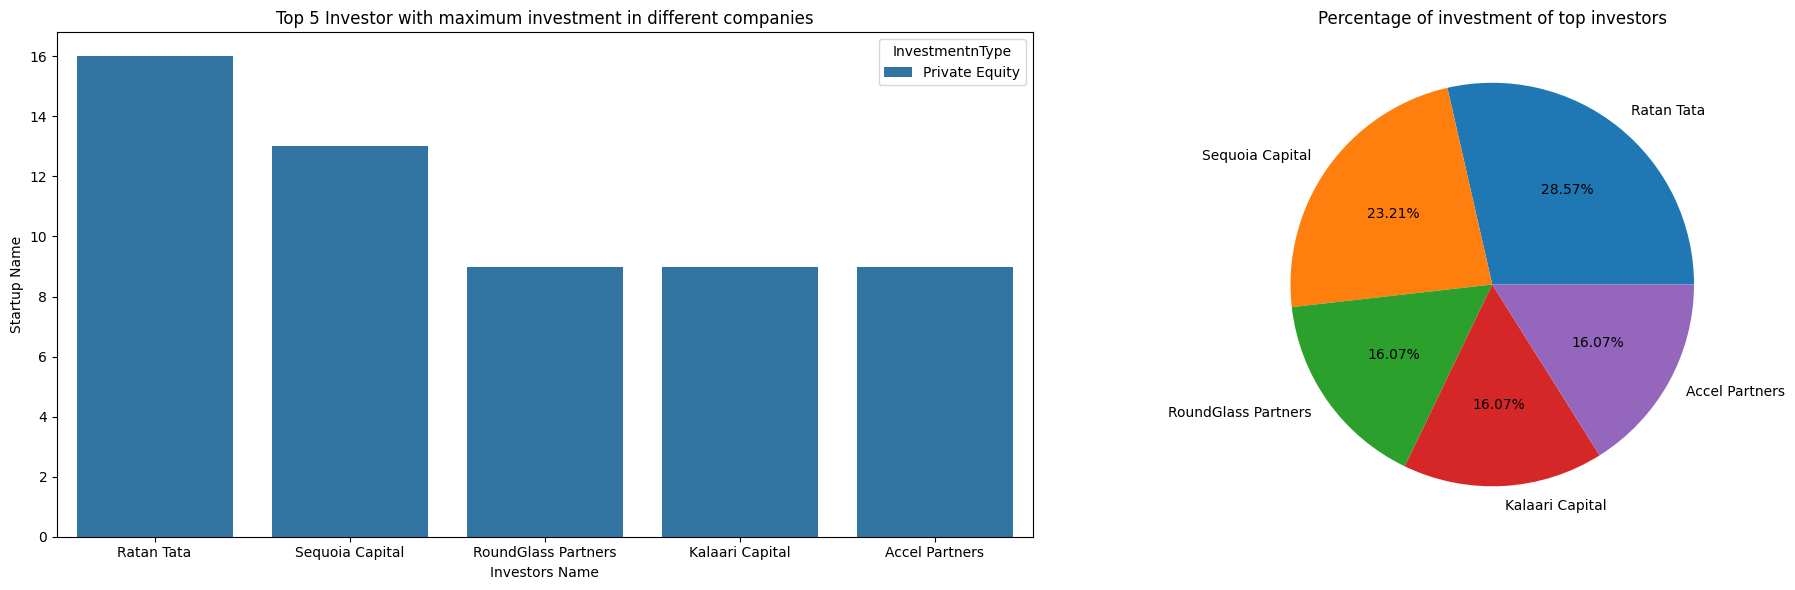

In [ ]:
# plot a graph with with two subplot, one is bar graph and another is pie chart
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
sns.barplot(df3_sc , x = 'Investors Name' , y = 'Startup Name' , hue = 'InvestmentnType')
plt.title('Top 5 Investor with maximum investment in different companies')

plt.subplot(1,2,2)
plt.pie(df3_sc['Startup Name'] , labels = df3_sc['Investors Name'] , autopct ='%.2f%%')
plt.title('Percentage of investment of top investors')

plt.tight_layout()
plt.show()

**Justification :**

Here I found the **top 5 investors(['Ratan Tata' , 'Sequoia Capital' ,  
'RoundGlass Partners' , 'Kalaari Capital' , 'Accel Partners'])** who have invested in a different number of startups and their investment type is Private Equity. since my friend's startup is now in growth stage so the best-suited investment type is Private Equity. So if he contact those top investor for investment for 'Privet Equity',then it's helpfull for his startup's growth.
Also we see that between these top investors maximum are also listed by previous analysis. so it is pretty ovious that they are best choice as a investor and Ratan Tata play a major role as a Investor So I suggest my friend to apporch them again for positive push in his startup for 'Privet Equity' sector also.

******
******